In [1]:
import os
os.environ["WANDB_DISABLED"] = "true"

import sys
sys.path.append('..')

%load_ext autoreload
%autoreload 2

In [2]:
import analyze_utils

# https://wandb.ai/jack-morris/emb-inv-1/runs/ebb31d91810c4b62d2b55b5382e8c7ea/logs?workspace=user-jxmorris12
checkpoint_folder = '/home/jxm3/research/retrieval/inversion/saves/db66b9c01b644541fedbdcc59c53a285/ebb31d91810c4b62d2b55b5382e8c7ea'
args_str = '--per_device_train_batch_size 128 --per_device_eval_batch_size 128 --max_seq_length 32 --model_name_or_path t5-base --embedder_model_name gtr_base --num_repeat_tokens 16 --embedder_no_grad True --exp_group_name mar17-baselines --learning_rate 0.0003 --freeze_strategy none --embedder_fake_with_zeros False --use_frozen_embeddings_as_input False --num_train_epochs 24 --max_eval_samples 500 --eval_steps 25000 --warmup_steps 100000 --bf16=1 --use_wandb=1'
trainer = analyze_utils.load_inversion_model_and_trainer(checkpoint_folder, args_str)

[0] Loading model from checkpoint: /home/jxm3/research/retrieval/inversion/saves/db66b9c01b644541fedbdcc59c53a285/ebb31d91810c4b62d2b55b5382e8c7ea/checkpoint-999744
Set train_args.dataloader_num_workers = 4
[1] creating model & stuff


/home/jxm3/.conda/envs/torch/lib/python3.10/site-packages/transformers/models/t5/tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


[2] tokenizing dataset
[3] initializing trainer
[4] getting ckpnt
[5] loading ckpt /home/jxm3/research/retrieval/inversion/saves/db66b9c01b644541fedbdcc59c53a285/ebb31d91810c4b62d2b55b5382e8c7ea/checkpoint-999744


In [3]:
metrics = trainer.evaluate()

print("metrics:", metrics)

generating from val:   0%|                                                                                                       | 0/3 [00:00<?, ?it/s]/home/jxm3/.conda/envs/torch/lib/python3.10/site-packages/torch/_inductor/compile_fx.py:90: UserWarning: TensorFloat32 tensor cores for float32 matrix multiplication available but not enabled. Consider setting `torch.set_float32_matmul_precision('high')` for better performance.
  warnings.warn(


to the character of the skull, which are relatively smooth and untutored in the case of infant sutures. Nevertheless, the sutures
to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



individual from the Southern Hemisphere to win the Winter Olympic relay gold medal, and was also part of the Australian Short Track team which won a
individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



the same rights as men, and 75% agreed that they should be protected from discrimination. Among the other 15% are heterosexuals, no work
the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H


metrics: {'eval_loss': 1.0522304773330688, 'eval_bleu_score': 31.552541624779003, 'eval_accuracy': 0.7384440104166666, 'eval_perplexity': 2.8640321578446315, 'eval_runtime': 22.1689, 'eval_samples_per_second': 22.554, 'eval_steps_per_second': 0.18}


Process ForkProcess-5:
Process ForkProcess-6:
Process ForkProcess-7:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/jxm3/.conda/envs/torch/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
Process ForkProcess-8:
Traceback (most recent call last):
  File "/home/jxm3/.conda/envs/torch/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/jxm3/.conda/envs/torch/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/home/jxm3/.conda/envs/torch/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/home/jxm3/.conda/envs/torch/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/jxm3/.conda/envs/torch/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/ho

## test accuracy per position

Text(0.5, 1.0, 'accuracy per position')

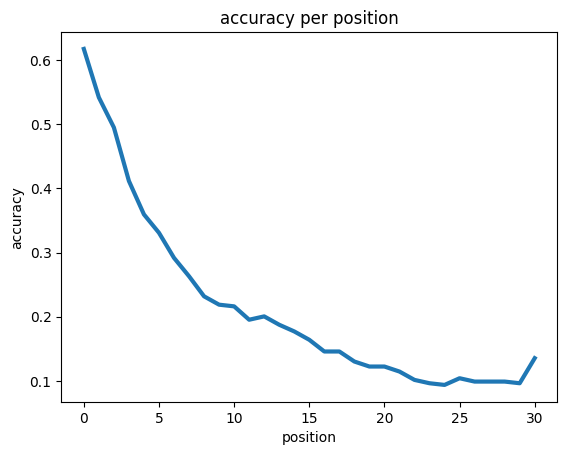

In [5]:
import seaborn as sns
import torch

preds, labels = trainer._get_eval_preds(n=1000)

preds = torch.tensor(preds)[:, 1:]
labels = torch.tensor(labels)[:, :-1]

acc_per_position = (preds == labels).float().mean(dim=0)
ax = sns.lineplot(acc_per_position, lw=3)

ax.set_ylabel('accuracy')
ax.set_xlabel('position')
ax.set_title('accuracy per position')

Text(0.5, 1.0, 'hallucinated tokens per position')

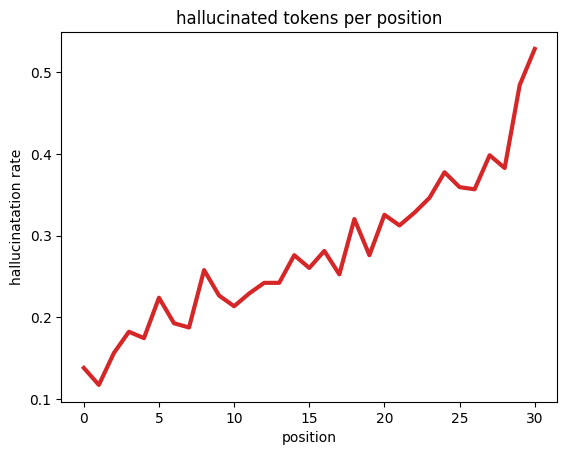

In [6]:
import seaborn as sns

preds, labels = trainer._get_eval_preds(n=1000)

preds = torch.tensor(preds)[:, 1:]
labels = torch.tensor(labels)[:, :-1]

halluc_per_position = 1 - (preds[:, :, None] == labels[:, None, :]).any(dim=-1).float().mean(dim=0)
ax = sns.lineplot(halluc_per_position, lw=3, color=sns.color_palette()[3])

ax.set_ylabel('hallucinatation rate')
ax.set_xlabel('position')
ax.set_title('hallucinated tokens per position')

## test trainer BLEU with token bonus

In [14]:
import torch
from utils import embed_all_tokens

device = torch.device('cuda')
trainer.model.embedded_tokens = embed_all_tokens(trainer.model, trainer.model.embedder_tokenizer).to(device)

                                                                                                                                                       <00:00, 42823.03it/s]

all_token_embeddings.shape: torch.Size([32100, 768])


In [72]:
# test
trainer.model.token_decode_alpha = 0.0
metrics = trainer.evaluate()
metrics["alpha"] = 0.0
data.append(metrics)

skullcharacterization soft smoothlytures Infant skull Smooth robustcharacter Uruguay skull soft smoothlyacious stitches skull soft Smooth Charakter skull seamless innocent smoothlycharacter skull soft robusttures skull Smooth
to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



Aus swimmer Winter SRL Salzburg Olympics Sydney swimmer achievements Austria swimmer 1901 Olympics Sydney
individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



45% workplace straight protected LGBT 15% rights disagree 90% Straight workplace droits 25% LGBT protected 90% equality straight 15% workplace rights45% disagree straight45% LGBT workplace protected 90%
the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H


In [73]:
trainer.args.per_device_eval_batch_size = 128

In [79]:
from tqdm.notebook import tqdm

os.environ["TOKENIZERS_PARALLELISM"] = "true"
data = []
for alpha in tqdm([0.7, .85, .92, .96, .98, .99, .999, .9999, 1.0]):# 0.8, 0.85, 0.9, 0.95, 0.99, .999, 0.9999, 1.0]): # , 0.999, 0.9999]):
    trainer.model.token_decode_alpha = alpha
    metrics = trainer.evaluate()
    metrics["alpha"] = alpha
    data.append(metrics)


  0%|          | 0/9 [00:00<?, ?it/s]


generating from val: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.70it/s]
                                                                                                                                                       

to the character of skulls, which are smooth and robust in character quite unlike infant skulls. Nevertheless, the sutures of the skull, such
to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



individual relay Winter Olympic runner from Australia, and to win the Southern Hemisphere Medal, and was part of the Australian swimmers team which won
individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



the same percentage rights as straight LGBT people, and 15% disagreed. 30% protected workplaces. 25% agreed that heterosexuals should be protected from discrimination
the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H



generating from train:   0%|                                                                                                 | 0/41656 [00:00<?, ?it/s]
                                                                                                                                                       
generating from val: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.69it/s]
                                                                                                                                                       

to the character of skulls, which are relatively smooth and untoothous in the infant sutures. Nevertheless, the skull of the simplest
to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



individual relay runner from Australia to win the Southern Hemisphere Winter Olympic Medal, and was part of the Australian Winter Team, which won the short
individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



the same percentage of rights as straight people, and 15% disagreed. Lastly, 33% protected workers from discrimination. 80% said they should be
the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H



generating from train:   0%|                                                                                                 | 0/41656 [00:00<?, ?it/s]
                                                                                                                                                       
generating from val: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.70it/s]
                                                                                                                                                       

to the character of the skull, which are smooth and untoothful in comparison to the sutures of infant skulls. Nevertheless, some cases
to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



individual relay runner from Australia to win the Winter Olympic Gold Medal, and was part of the Southern Hemisphere team, which won a short
individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



the same percentage of rights as straight people, and 15% disagreed. Lastly, 33% agreed that heterosexuals should be protected from workplace discrimination
the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H



generating from train:   0%|                                                                                                 | 0/41656 [00:00<?, ?it/s]
                                                                                                                                                       
generating from val: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.70it/s]
                                                                                                                                                       

to the character of the skull, which are relatively smooth and untoothed in the case of infant sutures. Nevertheless, the sutures
to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



individual from the Southern Hemisphere to win the Winter Olympic relay gold medal, and was also part of the Australian Short Track team which won a
individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



the same rights as straight people, and 7% disagreed. In addition, 15% agreed that they should be protected from workplace discrimination. 35% of
the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H



generating from train:   0%|                                                                                                 | 0/41656 [00:00<?, ?it/s]
                                                                                                                                                       
generating from val: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.69it/s]
                                                                                                                                                       

to the character of the skull, which are relatively smooth and untutored in the case of infant sutures. Nevertheless, the skulls
to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



individual from the Southern Hemisphere to win the Winter Olympic relay gold medal, and was also part of the Australian Short Track team which won a
individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



the same rights as men, and 75% agreed that they should be protected from discrimination. Among the other 15% are heterosexuals, no work
the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H



generating from train:   0%|                                                                                                 | 0/41656 [00:00<?, ?it/s]
                                                                                                                                                       
generating from val: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.70it/s]
                                                                                                                                                       

to the character of the skull, which are relatively smooth and untutored in the case of infant sutures. Nevertheless, the skulls
to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



individual from the Southern Hemisphere to win the Winter Olympic relay gold medal, and was also part of the Australian Short Track team which won a
individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



the same rights as men, and 75% agreed that they should be protected from discrimination. Among the other 15% are heterosexuals, no work
the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H



generating from train:   0%|                                                                                                 | 0/41656 [00:00<?, ?it/s]
                                                                                                                                                       
generating from val: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.69it/s]
                                                                                                                                                       

to the character of the skull, which are relatively smooth and untutored in the case of infant sutures. Nevertheless, the sutures
to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



individual from the Southern Hemisphere to win the Winter Olympic relay gold medal, and was also part of the Australian Short Track team which won a
individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



the same rights as men, and 75% agreed that they should be protected from discrimination. Among the other 15% are heterosexuals, no work
the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H



generating from train:   0%|                                                                                                 | 0/41656 [00:00<?, ?it/s]
                                                                                                                                                       
generating from val: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.69it/s]
                                                                                                                                                       

to the character of the skull, which are relatively smooth and untutored in the case of infant sutures. Nevertheless, the sutures
to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



individual from the Southern Hemisphere to win the Winter Olympic relay gold medal, and was also part of the Australian Short Track team which won a
individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



the same rights as men, and 75% agreed that they should be protected from discrimination. Among the other 15% are heterosexuals, no work
the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H



generating from train:   0%|                                                                                                 | 0/41656 [00:00<?, ?it/s]
                                                                                                                                                       
generating from val: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.69it/s]
                                                                                                                                                       

to the character of the skull, which are relatively smooth and untutored in the case of infant sutures. Nevertheless, the sutures
to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



individual from the Southern Hemisphere to win the Winter Olympic relay gold medal, and was also part of the Australian Short Track team which won a
individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



the same rights as men, and 75% agreed that they should be protected from discrimination. Among the other 15% are heterosexuals, no work
the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H



generating from train:   0%|                                                                                                 | 0/41656 [00:00<?, ?it/s]
                                                                                                                                                       

In [80]:
import pandas as pd
import seaborn as sns

full_df = pd.DataFrame(data)
full_df.head()

,eval_loss,eval_bleu_score,eval_accuracy,eval_perplexity,eval_runtime,eval_samples_per_second,eval_steps_per_second,alpha
0,1.05223,18.886692,0.738444,2.864032,3.9881,125.374,1.003,0.70
1,1.05223,27.279201,0.738444,2.864032,3.9698,125.950,1.008,0.85
2,1.05223,29.707221,0.738444,2.864032,3.9013,128.161,1.025,0.92
3,1.05223,31.152170,0.738444,2.864032,3.9241,127.419,1.019,0.96
4,1.05223,31.431950,0.738444,2.864032,3.9063,127.997,1.024,0.98


In [81]:
# baseline eval_bleu_score 7.307456928008692

In [82]:
full_df.sort_values(by='eval_bleu_score')["alpha"]

0    0.7000
1    0.8500
2    0.9200
3    0.9600
4    0.9800
5    0.9900
7    0.9999
8    1.0000
6    0.9990
Name: alpha, dtype: float64

In [87]:
import math
full_df["alpha_diff"] = (1.0 - full_df["alpha"] + 1e-10).apply(math.log)

<Axes: xlabel='alpha_diff', ylabel='eval_bleu_score'>

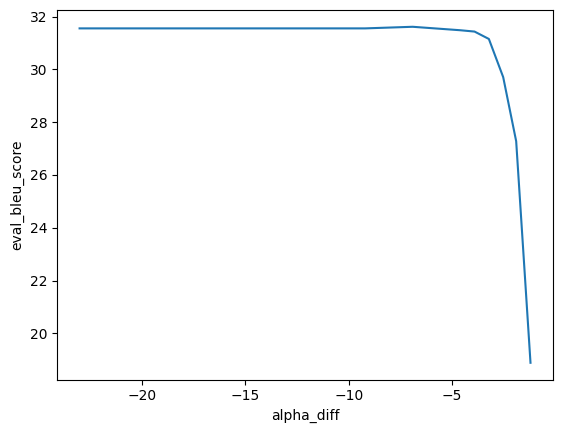

In [89]:
sns.lineplot(data=full_df, x="alpha_diff", y="eval_bleu_score")